<a href="https://colab.research.google.com/github/Pedro-Prestes/learning/blob/master/LV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **`Análise do CONSTRUTO _ "Learning Vector's”.`**

In [196]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import metrics
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
%matplotlib inline
!pip3 install bokeh

In [0]:
lv = pd.read_csv('/content/drive/My Drive/Pesquisa_Doutorado/Análise_doutorado/Escolas_participantes/Construtos em CSV/Construto_Geral_3ºMódulo.csv')

In [198]:
lv.head()

,Escolas,"O material didático, disponível me ajudou a compreender o conteúdo",A disposição do conteúdo didático no material do modulo foi de fácil compreensão e assimilação,O material on line foi adequado aos conteúdos programáticos do módulo,O método de avaliação utilizado instiga minha participação na atividade,O professor propôs leituras complementares combinadas com práticas através dos objetos digitais de aprendizagens,As práticas e simulações oriundas dos objetos de aprendizagens – ODAS que estão relacionados às disciplinas estão coerentes com o conteúdo ensinado,As minhas participações poderão colaborar com meus colegas em atividades em grupo ao serem avaliadas,Em minhas participações foi possivel conferir meu desempenho gradativamente
0,Escola CA,4,4,4,4,4,4,4,4
1,Escola CA,4,4,4,4,4,4,4,4
2,Escola CA,3,3,4,3,4,4,3,3
3,Escola CA,4,4,4,4,4,3,4,4
4,Escola CA,4,4,4,4,4,4,4,4


In [199]:
lv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column                                                                                                                                               Non-Null Count  Dtype 
---  ------                                                                                                                                               --------------  ----- 
 0   Escolas                                                                                                                                              50 non-null     object
 1   O material didático, disponível me ajudou a compreender o conteúdo                                                                                   50 non-null     int64 
 2   A disposição do conteúdo didático no material do modulo foi de fácil compreensão e assimilação                                                       50 non-null     int64 
 3   O materi

In [0]:
lv.rename({'O material didático, disponível me ajudou a compreender o conteúdo':'Q001','A disposição do conteúdo didático no material do modulo foi de fácil compreensão e assimilação':'Q002','O material on line foi adequado aos conteúdos programáticos do módulo':'Q003','O método de avaliação utilizado instiga minha participação na atividade':'Q004','O professor propôs leituras complementares combinadas com práticas através dos objetos digitais de aprendizagens':'Q005','As práticas e simulações oriundas dos objetos de aprendizagens – ODAS que estão relacionados às disciplinas estão coerentes com o conteúdo ensinado':'Q006','As minhas participações poderão colaborar com meus colegas em atividades em grupo ao serem avaliadas':'Q007','Em minhas participações foi possivel conferir meu desempenho gradativamente':'Q008'}, axis='columns', inplace=True)

In [201]:
lv.head()

,Escolas,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008
0,Escola CA,4,4,4,4,4,4,4,4
1,Escola CA,4,4,4,4,4,4,4,4
2,Escola CA,3,3,4,3,4,4,3,3
3,Escola CA,4,4,4,4,4,3,4,4
4,Escola CA,4,4,4,4,4,4,4,4


In [0]:
lv = lv.set_index('Escolas')

In [203]:
lv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Escola CA to Escola RF
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Q001    50 non-null     int64
 1   Q002    50 non-null     int64
 2   Q003    50 non-null     int64
 3   Q004    50 non-null     int64
 4   Q005    50 non-null     int64
 5   Q006    50 non-null     int64
 6   Q007    50 non-null     int64
 7   Q008    50 non-null     int64
dtypes: int64(8)
memory usage: 3.5+ KB


In [204]:
lv.head()

,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008
Escolas,,,,,,,,
Escola CA,4,4,4,4,4,4,4,4
Escola CA,4,4,4,4,4,4,4,4
Escola CA,3,3,4,3,4,4,3,3
Escola CA,4,4,4,4,4,3,4,4
Escola CA,4,4,4,4,4,4,4,4


In [205]:
lv.isnull()

,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008
Escolas,,,,,,,,
Escola CA,False,False,False,False,False,False,False,False
Escola CA,False,False,False,False,False,False,False,False
Escola CA,False,False,False,False,False,False,False,False
Escola CA,False,False,False,False,False,False,False,False
Escola CA,False,False,False,False,False,False,False,False
Escola CA,False,False,False,False,False,False,False,False
Escola CA,False,False,False,False,False,False,False,False
Escola CA,False,False,False,False,False,False,False,False
Escola CA,False,False,False,False,False,False,False,False


In [0]:
lv.dropna(inplace=True)

In [207]:
lv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Escola CA to Escola RF
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Q001    50 non-null     int64
 1   Q002    50 non-null     int64
 2   Q003    50 non-null     int64
 3   Q004    50 non-null     int64
 4   Q005    50 non-null     int64
 5   Q006    50 non-null     int64
 6   Q007    50 non-null     int64
 7   Q008    50 non-null     int64
dtypes: int64(8)
memory usage: 3.5+ KB


In [208]:
lv.columns.values

array(['Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008'],
      dtype=object)

In [209]:
lv.duplicated()

Escolas
Escola CA    False
Escola CA     True
Escola CA    False
Escola CA    False
Escola CA     True
Escola CA    False
Escola CA     True
Escola CA     True
Escola CA     True
Escola CA     True
Escola CA     True
Escola CA     True
Escola CA     True
Escola CA     True
Escola RP    False
Escola RP     True
Escola RP    False
Escola RP    False
Escola RP    False
Escola RP    False
Escola RP     True
Escola RP    False
Escola RP     True
Escola RP    False
Escola RP    False
Escola RP     True
Escola RP     True
Escola RP    False
Escola RP    False
Escola RP    False
Escola RF    False
Escola RF    False
Escola RF    False
Escola RF     True
Escola RF     True
Escola RF    False
Escola RF     True
Escola RF     True
Escola RF    False
Escola RF     True
Escola RF    False
Escola RF     True
Escola RF     True
Escola RF     True
Escola RF     True
Escola RF     True
Escola RF     True
Escola RF     True
Escola RF     True
Escola RF     True
dtype: bool

In [210]:
lv.drop_duplicates()

,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008
Escolas,,,,,,,,
Escola CA,4,4,4,4,4,4,4,4
Escola CA,3,3,4,3,4,4,3,3
Escola CA,4,4,4,4,4,3,4,4
Escola CA,4,4,4,3,4,4,4,4
Escola RP,4,3,4,3,4,4,4,4
Escola RP,3,4,3,3,2,4,4,3
Escola RP,4,3,3,3,4,4,4,3
Escola RP,4,4,3,4,4,3,4,4
Escola RP,4,3,4,4,4,4,4,4


In [211]:
lv.duplicated()

Escolas
Escola CA    False
Escola CA     True
Escola CA    False
Escola CA    False
Escola CA     True
Escola CA    False
Escola CA     True
Escola CA     True
Escola CA     True
Escola CA     True
Escola CA     True
Escola CA     True
Escola CA     True
Escola CA     True
Escola RP    False
Escola RP     True
Escola RP    False
Escola RP    False
Escola RP    False
Escola RP    False
Escola RP     True
Escola RP    False
Escola RP     True
Escola RP    False
Escola RP    False
Escola RP     True
Escola RP     True
Escola RP    False
Escola RP    False
Escola RP    False
Escola RF    False
Escola RF    False
Escola RF    False
Escola RF     True
Escola RF     True
Escola RF    False
Escola RF     True
Escola RF     True
Escola RF    False
Escola RF     True
Escola RF    False
Escola RF     True
Escola RF     True
Escola RF     True
Escola RF     True
Escola RF     True
Escola RF     True
Escola RF     True
Escola RF     True
Escola RF     True
dtype: bool

In [212]:
lv.dtypes

Q001    int64
Q002    int64
Q003    int64
Q004    int64
Q005    int64
Q006    int64
Q007    int64
Q008    int64
dtype: object

In [213]:
# Análise do mecanismo LV
# As  ("Q004", "Q007" e "Q008") são as questões ligadas diretamente ao mecanismo de avaliação LV.

# 1   O material didático, disponível me ajudou a compreender o conteúdo                                                                                   50 non-null     int64 
# 2   A disposição do conteúdo didático no material do modulo foi de fácil compreensão e assimilação                                                       50 non-null     int64 
# 3   O material on line foi adequado aos conteúdos programáticos do módulo                                                                                50 non-null     int64 
# 4   O método de avaliação utilizado instiga minha participação na atividade                                                                              50 non-null     int64 
# 5   O professor propôs leituras complementares combinadas com práticas através dos objetos digitais de aprendizagens                                     50 non-null     int64 
# 6   As práticas e simulações oriundas dos objetos de aprendizagens – ODAS que estão relacionados às disciplinas estão coerentes com o conteúdo ensinado  50 non-null     int64 
# 7   As minhas participações poderão colaborar com meus colegas em atividades em grupo ao serem avaliadas                                                 50 non-null     int64 
# 8   Em minhas participações foi possivel conferir meu desempenho gradativamente 

# Em correlação de Pearson, conforme quadro abaixo, observa-se que entre elas existem "fraca" correlação.
# Em ("Q002" e "Q007") existe moderada correlação, para melhor interpretação poderá ser aplicada a técnica de dispersão contudo nãão vejo relevância. 
lv.corr('pearson')

,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008
Q001,1.000000,0.265694,0.221519,0.181274,0.181568,0.079520,0.553571,0.468259
Q002,0.265694,1.000000,0.346173,0.185967,-0.025976,0.102389,0.648906,0.359025
Q003,0.221519,0.346173,1.000000,-0.082270,0.303204,0.322493,0.221519,0.516241
Q004,0.181274,0.185967,-0.082270,1.000000,0.325925,0.023204,0.181274,0.374829
Q005,0.181568,-0.025976,0.303204,0.325925,1.000000,0.014438,0.030261,0.369800
Q006,0.079520,0.102389,0.322493,0.023204,0.014438,1.000000,0.221519,0.190879
Q007,0.553571,0.648906,0.221519,0.181274,0.030261,0.221519,1.000000,0.354604
Q008,0.468259,0.359025,0.516241,0.374829,0.369800,0.190879,0.354604,1.000000


In [0]:
# Calcule a correlação  
correlacoes = lv.corr()

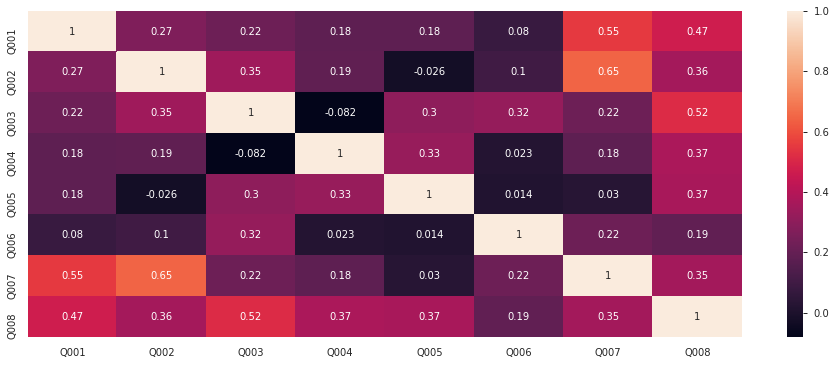

In [215]:
# Usando o método heatmap do seaborn
plt.figure(figsize=(16, 6))
sns.heatmap(data=correlacoes, annot=True)

In [216]:
# Apenas uma amostragem por acionamento mecânico, contudo vale apena automatizar como demonstrado acima.
lv['Q004'].corr(lv['Q007'])

0.1812740206014083

In [217]:
lv['Q004'].corr(lv['Q008'])

0.3748289155438126

In [218]:
lv['Q007'].corr(lv['Q008'])

0.3546040716334874

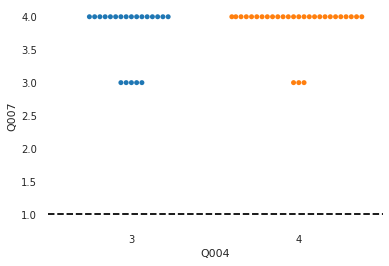

In [219]:
sns.swarmplot(data=lv, x='Q004', y='Q007')
plt.axhline(1.0, color='black', linestyle='--')

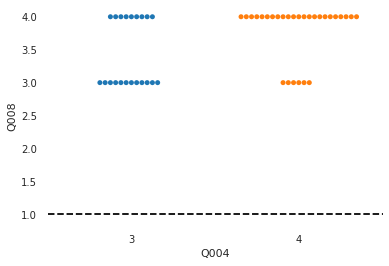

In [220]:
sns.swarmplot(data=lv, x='Q004', y='Q008')
plt.axhline(1.0, color='black', linestyle='--')

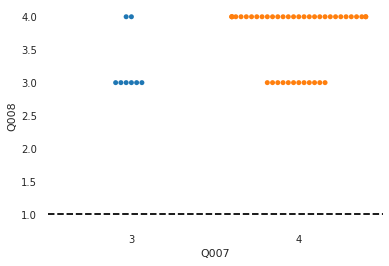

In [221]:
sns.swarmplot(data=lv, x='Q007', y='Q008')
plt.axhline(1.0, color='black', linestyle='--')

In [0]:
#X = lv.drop(['Q004'], axis=1)
#y = lv['Q004']

In [0]:
X = lv.drop(['Q004'], axis=1)
y = lv['Q004']

In [224]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif
f_classif = SelectKBest(score_func=f_classif, k=4)
fit = f_classif.fit(X,y)
features = fit.transform(X)

# Visualizando as features:
print(features)

[[4 4 4 4]
 [4 4 4 4]
 [3 4 3 3]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [3 4 3 3]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [3 4 4 4]
 [4 4 4 4]
 [4 2 4 3]
 [3 4 4 3]
 [4 4 4 4]
 [3 4 4 4]
 [4 4 4 4]
 [3 4 4 3]
 [4 4 4 4]
 [3 4 3 3]
 [3 4 3 4]
 [4 4 4 4]
 [3 4 4 4]
 [3 3 3 3]
 [4 4 4 4]
 [4 4 3 4]
 [4 4 4 3]
 [4 4 4 3]
 [3 4 3 3]
 [4 4 4 4]
 [4 4 4 4]
 [4 3 4 3]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 3]
 [4 4 4 4]
 [4 4 4 3]
 [4 4 4 3]
 [4 4 4 3]
 [3 4 3 3]
 [4 4 4 4]
 [4 4 4 4]
 [4 3 4 3]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 3]]


In [225]:
cols = fit.get_support(indices=True)
lv.iloc[:,cols]

,Q002,Q004,Q006,Q007
Escolas,,,,
Escola CA,4,4,4,4
Escola CA,4,4,4,4
Escola CA,3,3,4,3
Escola CA,4,4,3,4
Escola CA,4,4,4,4
Escola CA,4,3,4,4
Escola CA,4,4,4,4
Escola CA,4,4,4,4
Escola CA,4,4,4,4


In [0]:
#features categóricas ou variável alvo categórica
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [0]:
# feature extraction
test = SelectKBest(chi2, k=4)

In [0]:
fit = test.fit(X, y)

In [229]:
fit.get_support(indices=True)

array([1, 3, 5, 6])

In [0]:
features = fit.transform(X)

In [231]:
# Visualizando as features:
print(features)

[[4 4 4 4]
 [4 4 4 4]
 [3 4 3 3]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [3 4 3 3]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [3 4 4 4]
 [4 4 4 4]
 [4 2 4 3]
 [3 4 4 3]
 [4 4 4 4]
 [3 4 4 4]
 [4 4 4 4]
 [3 4 4 3]
 [4 4 4 4]
 [3 4 3 3]
 [3 4 3 4]
 [4 4 4 4]
 [3 4 4 4]
 [3 3 3 3]
 [4 4 4 4]
 [4 4 3 4]
 [4 4 4 3]
 [4 4 4 3]
 [3 4 3 3]
 [4 4 4 4]
 [4 4 4 4]
 [4 3 4 3]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 3]
 [4 4 4 4]
 [4 4 4 3]
 [4 4 4 3]
 [4 4 4 3]
 [3 4 3 3]
 [4 4 4 4]
 [4 4 4 4]
 [4 3 4 3]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 3]]


In [232]:
cols = fit.get_support(indices=True)
lv.iloc[:, cols]

,Q002,Q004,Q006,Q007
Escolas,,,,
Escola CA,4,4,4,4
Escola CA,4,4,4,4
Escola CA,3,3,4,3
Escola CA,4,4,3,4
Escola CA,4,4,4,4
Escola CA,4,3,4,4
Escola CA,4,4,4,4
Escola CA,4,4,4,4
Escola CA,4,4,4,4


In [0]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)
from sklearn.feature_selection import RFE
rfe = RFE(model, 4)
fit = rfe.fit(X, y)

In [234]:
# Mostrando o número de features:
print ("Número de features: {}".format(fit.n_features_))  

Número de features: 4


In [235]:
# Visualizando os índices:
cols = fit.get_support(indices=True)
lv.iloc[:,cols]

,Q002,Q003,Q004,Q007
Escolas,,,,
Escola CA,4,4,4,4
Escola CA,4,4,4,4
Escola CA,3,4,3,3
Escola CA,4,4,4,4
Escola CA,4,4,4,4
Escola CA,4,4,3,4
Escola CA,4,4,4,4
Escola CA,4,4,4,4
Escola CA,4,4,4,4


In [0]:
from sklearn.ensemble import RandomForestClassifier

In [237]:
# feature extraction
model = RandomForestClassifier(n_estimators=10)
model.fit(X, y)
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [238]:
# Score de cada um dos atributos:
print(model.feature_importances_)

[0.18069269 0.18467847 0.19347289 0.09519468 0.10134409 0.11449207
 0.13012511]


In [239]:
# Nome das colunas:
lv

,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008
Escolas,,,,,,,,
Escola CA,4,4,4,4,4,4,4,4
Escola CA,4,4,4,4,4,4,4,4
Escola CA,3,3,4,3,4,4,3,3
Escola CA,4,4,4,4,4,3,4,4
Escola CA,4,4,4,4,4,4,4,4
Escola CA,4,4,4,3,4,4,4,4
Escola CA,4,4,4,4,4,4,4,4
Escola CA,4,4,4,4,4,4,4,4
Escola CA,4,4,4,4,4,4,4,4


In [240]:
# Criando um Dataframe com as colunas e seus scores:
import pandas as pd
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
Q003,0.193473
Q002,0.184678
Q001,0.180693
Q008,0.130125
Q007,0.114492
Q006,0.101344
Q005,0.095195


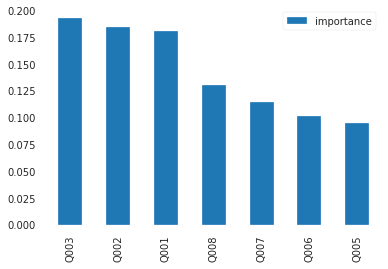

In [241]:
# Visualizando as importâncias de forma gráfica:
feature_importances.plot(kind='bar')

In [242]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
  ('feature_selection', RFE(LogisticRegression(max_iter=2000),4)),
  ('classification', RandomForestClassifier())
])
clf.fit(X, y)

Pipeline(memory=None,
         steps=[('feature_selection',
                 RFE(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                  dual=False,
                                                  fit_intercept=True,
                                                  intercept_scaling=1,
                                                  l1_ratio=None, max_iter=2000,
                                                  multi_class='auto',
                                                  n_jobs=None, penalty='l2',
                                                  random_state=None,
                                                  solver='lbfgs', tol=0.0001,
                                                  verbose=0, warm_start=False),
                     n_features_to_select=4, step=1, verbose=0)),
                ('classi...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        cl

In [243]:
clf.steps

[('feature_selection',
  RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=2000,
                                   multi_class='auto', n_jobs=None, penalty='l2',
                                   random_state=None, solver='lbfgs', tol=0.0001,
                                   verbose=0, warm_start=False),
      n_features_to_select=4, step=1, verbose=0)),
 ('classification',
  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=None, max_features='auto',
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=100,
                         n_j

In [244]:
lv.describe()

,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,3.840000,3.760000,3.820000,3.580000,3.900000,3.820000,3.840000,3.640000
std,0.370328,0.431419,0.388088,0.498569,0.364216,0.388088,0.370328,0.484873
min,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000
25%,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [0]:
# Árvore de decisão será o próximo passo de nossa análise, 
# contudo vale apena deixar claro que esta técnica está propência
# a embaralhar os resultados dos testes em relação ao resultado de treinos permitindo o overfitting, e também é um pouco instável.

# Dividindo os dados em treino e teste:
X_train, X_test, y_train, y_test = train_test_split(lv.drop('Q004',axis=1),lv['Q004'],test_size=0.3)

In [246]:
# Verificando as formas dos dados:
X_train.shape,X_test.shape

((35, 7), (15, 7))

In [0]:
# Instânciando o objeto classificador:
clf = DecisionTreeClassifier()

In [0]:
# Treinando o modelo de arvore de decisão:
clf = clf.fit(X_train,y_train)

In [249]:
# Verificando as features mais importantes para o modelo treinado:
clf.feature_importances_

# O código acima nos retorna um array com o valor de cada variável:

array([0.04033807, 0.18286592, 0.        , 0.07260853, 0.1466839 ,
       0.10762134, 0.44988224])

In [250]:
for feature, importances_ in zip(eden.columns,clf.feature_importances_):
    print("{}:{}".format(feature, importances_))

# Confirmando a melhor correlação (Q002) para (Q006).
# segundo teste - confirmando a melhor correlaçãão (Q001) para (Q003)
# Saída:

Q001:0.04033807145601232
Q002:0.18286592393392245
Q003:0.0
Q004:0.07260852862082215
Q005:0.146683896203681
Q006:0.10762133688857045
Q007:0.4498822428969916


In [251]:
resultado = clf.predict(X_test)
resultado
# O código acima nos da a seguinte saída:

array([3, 3, 4, 4, 4, 3, 4, 4, 3, 3, 3, 4, 3, 3, 3])

In [252]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

# Resultado do classification_report:

              precision    recall  f1-score   support

           3       0.22      0.67      0.33         3
           4       0.83      0.42      0.56        12

    accuracy                           0.47        15
   macro avg       0.53      0.54      0.44        15
weighted avg       0.71      0.47      0.51        15



In [253]:
# Renderizando a árvore de forma gráfica:
!pip3 install ipywidgets
!pip3 install graphviz
!pip3 install pydot
import pydot

In [0]:
import pydot
import graphviz

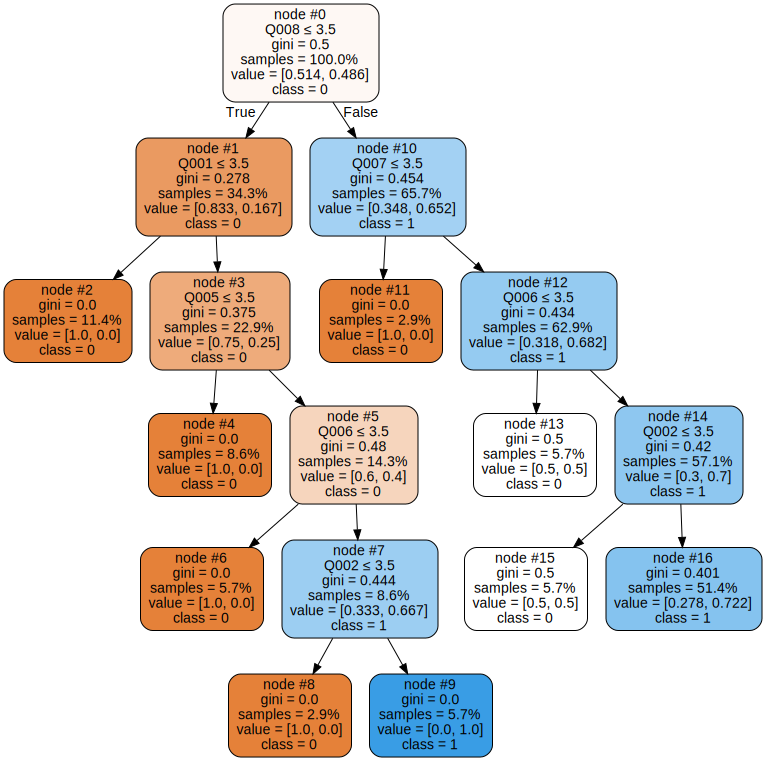

In [255]:
dot_data = export_graphviz( 
         clf, 
         out_file=None,
         feature_names=lv.drop('Q004',axis=1).columns,
         class_names=['0','1', '2','3','4'],  
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True
        )  
graph = graphviz.Source(dot_data)  
graph

In [256]:
# Renderizando a árvore de forma interativa:
from ipywidgets import interactive
from IPython.display import SVG,display
from graphviz import Source

# feature matrix
X,y = lv.drop('Q004',axis=1),lv['Q004']

# feature labels
features_label = lv.drop('Q004',axis=1).columns

# class label
class_label = ['1', '2','3','4']


def plot_tree(crit, split, depth, min_samples_split, min_samples_leaf=0.2):
    estimator = DecisionTreeClassifier(
           random_state = 0 
          ,criterion = crit
          ,splitter = split
          ,max_depth = depth
          ,min_samples_split=min_samples_split
          ,min_samples_leaf=min_samples_leaf
    )
    estimator.fit(X, y)
    graph = Source(export_graphviz(estimator
      , out_file=None
      , feature_names=features_label
      , class_names=class_label
      , impurity=True
      , filled = True))
    display(SVG(graph.pipe(format='svg')))
    return estimator

inter=interactive(plot_tree 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=[1,2,3,4,5,10,20,30]
   , min_samples_split=(1,5)
   , min_samples_leaf=(1,5))

display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


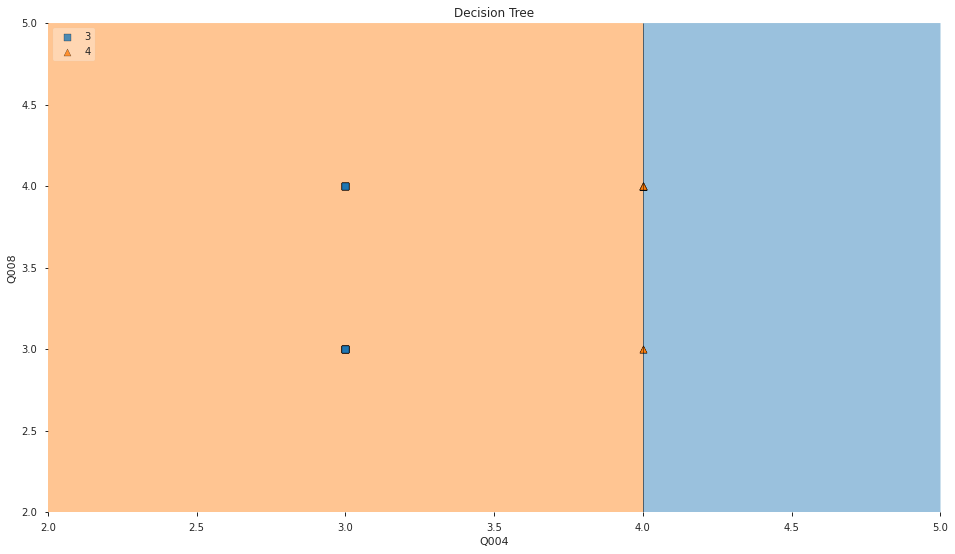

In [257]:
# Visualizando as fronteiras criadas pela arvore:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

def visualize_fronteiras(msamples_split,max_depth):
    X = lv[['Q004','Q008']].values
    y = lv.Q004.values
    clf = DecisionTreeClassifier(min_samples_split=msamples_split,max_depth=max_depth)
    tree = clf.fit(X, y)

    plt.figure(figsize=(16,9))
    plot_decision_regions(X, y, clf=tree, legend=2)

    plt.xlabel('Q004')
    plt.ylabel('Q008')
    plt.title('Decision Tree')
    plt.show()

# Chamando a função criada anteriormente:

visualize_fronteiras(10,max_depth=8)

In [258]:
# Navegando na estrutura da arvore de decisão:
estimator = DecisionTreeClassifier(max_depth=3,min_samples_split=2,min_samples_leaf=2)
estimator.fit(X, y)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold

print("Número de nós: {}".format(n_nodes))

Número de nós: 13


In [259]:
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("\nA arvore binária tem %s nós e a seguinte estrutura: \n"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snó=%s (nó folha)." % (node_depth[i] * "\t", i))
    else:
        print("%snó=%s (nó teste): vai para o nó %s se o valor do atributo %s <= %s \n se não, vai para o "
              "nó %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 lv.columns[feature[i]],
                 threshold[i],
                 children_right[i],
                 ))


A arvore binária tem 13 nós e a seguinte estrutura: 

nó=0 (nó teste): vai para o nó 1 se o valor do atributo Q007 <= 3.5 
 se não, vai para o nó 8.
	nó=1 (nó teste): vai para o nó 2 se o valor do atributo Q003 <= 3.5 
 se não, vai para o nó 5.
		nó=2 (nó teste): vai para o nó 3 se o valor do atributo Q004 <= 3.5 
 se não, vai para o nó 4.
			nó=3 (nó folha).
			nó=4 (nó folha).
		nó=5 (nó teste): vai para o nó 6 se o valor do atributo Q001 <= 3.5 
 se não, vai para o nó 7.
			nó=6 (nó folha).
			nó=7 (nó folha).
	nó=8 (nó teste): vai para o nó 9 se o valor do atributo Q002 <= 3.5 
 se não, vai para o nó 10.
		nó=9 (nó folha).
		nó=10 (nó teste): vai para o nó 11 se o valor do atributo Q005 <= 3.5 
 se não, vai para o nó 12.
			nó=11 (nó folha).
			nó=12 (nó folha).


In [0]:
def extrai_regras(sample_id):
    node_indicator = estimator.decision_path(X)

    leave_id = estimator.apply(X)

    #sample_id = sample
    node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                        node_indicator.indptr[sample_id + 1]]

    print('\nFeatures usadas para predizer a amostra %s' % (sample_id))

    for f,v in zip(lv.columns,X.iloc[sample_id].values):
        print('%s = %s'%(f,v))

    print('\n')      
    for node_id in node_index:
        if leave_id[sample_id] == node_id:
            continue

        if (X.iloc[sample_id, feature[node_id]] <= threshold[node_id]):
            threshold_sign = "<="
        else:
            threshold_sign = ">"

        print("id do nó de decisão %s : (atributo %s com valor = %s %s %s)"
              % (node_id,
                 lv.columns[feature[node_id]],
                 X.iloc[sample_id, feature[node_id]],
                 threshold_sign,
                 threshold[node_id]))
        
    pred =estimator.predict(X.iloc[sample_id].values.reshape(1, -1))
    print(pred) 
    print("\tClasse => %s" %pred)

In [261]:
extrai_regras(2)


Features usadas para predizer a amostra 2
Q001 = 3
Q002 = 3
Q003 = 4
Q004 = 4
Q005 = 4
Q006 = 3
Q007 = 3


id do nó de decisão 0 : (atributo Q007 com valor = 3 <= 3.5)
id do nó de decisão 1 : (atributo Q003 com valor = 4 > 3.5)
id do nó de decisão 5 : (atributo Q001 com valor = 3 <= 3.5)
[3]
	Classe => [3]


In [262]:
extrai_regras(7)


Features usadas para predizer a amostra 7
Q001 = 4
Q002 = 4
Q003 = 4
Q004 = 4
Q005 = 4
Q006 = 4
Q007 = 4


id do nó de decisão 0 : (atributo Q007 com valor = 4 > 3.5)
id do nó de decisão 8 : (atributo Q002 com valor = 4 > 3.5)
id do nó de decisão 10 : (atributo Q005 com valor = 4 > 3.5)
[4]
	Classe => [4]


In [263]:
# instalando o pandas profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.8.0-py2.py3-none-any.whl size=259932 sha256=0d1f5c42ac8422165aed9cf51dbfaeff12eb2bb224a08a26416baeeb26887afd
  Stored in directory: /tmp/pip-ephem-wheel-cache-9uzelpic/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [0]:
# import o ProfileReport
from pandas_profiling import ProfileReport

In [0]:
# executando o profile
profile = ProfileReport(eden, title='Relatório - Pandas Profiling', html={'style':{'full_width':True}})

In [266]:
profile

In [267]:
# salvando o relatório no disco
profile.to_file(output_file="Relatorio01.html")

In [0]:
#Interpretando o valor de ρ

    #0.9 a 1 positivo ou negativo indica uma correlação muito forte.
    #0.7 a 0.9 positivo ou negativo indica uma correlação forte.
    #0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
    #0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
    #0 a 0.3 positivo ou negativo indica uma correlação desprezível.